<a href="https://colab.research.google.com/github/rochak94/info-mis-6105-assignment5/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST typeface

This dataset is consist the MNIST database for handwritten digits. It has images representing digits from 0-9 produced using 2,990 google fonts files.


This file consists of 29,900 examples with labels and font names. Each row contains 786 elements: the first element represents the font name (ex-Chivo-Italic, Sen-Bold), the second element represents the label (a number from 0-9) and the remaining 784 elements represent the grayscale pixel values (from 0-255) for the 28x28 pixel image.

In [116]:
# import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
# Reading Data
data = pd.read_csv('/content/drive/MyDrive/mnist/data/TMNIST_Data.csv')
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
print(data['names'].unique())
print(data['names'].nunique())

['GrandHotel-Regular' 'EncodeSansCondensed-Medium' 'Varela-Regular' ...
 'CourierPrime-Italic' 'Bentham-Regular' 'AveriaSerifLibre-Ligh']
2990


In [119]:
data
type(data)

pandas.core.frame.DataFrame

In [120]:
data.describe()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,...,29900.000000,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003445,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493058,0.005783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:

data['names'].value_counts()

GrandHotel-Regular          10
Laila-Regular               10
Tajawal-Medium              10
Numans-Regular              10
PT_Sans-Web-Italic          10
                            ..
Thasadith-Bold              10
CherryBomb-Regular          10
NotoSansOriyaUI-Thin        10
Kodchasan-SemiBoldItalic    10
AveriaSerifLibre-Ligh       10
Name: names, Length: 2990, dtype: int64

In [122]:
# split dataset
X = data.drop({'labels','names'},axis=1)
y = data[['labels']]
print(X.shape, y.shape)

(29900, 784) (29900, 1)


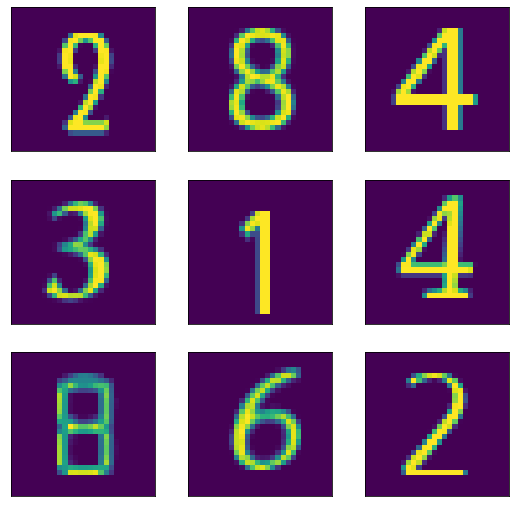

In [123]:
# show sample images
X_images = X.values.reshape(-1,28,28)
fig,axs = plt.subplots(3,3,figsize=(9,9))
for i in range(9):
    r=i//3
    c=i%3
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i])
plt.show()

Split the Dataframe into Training and Test Dataframe

In [124]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
y_train = y_train.values.reshape((-1,))
y_test = y_test.values.reshape((-1,))

print(X_train.shape)
print(X_test.shape)

(5980, 784)
(23920, 784)


In [94]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# y_train = y_train.values.reshape((-1,))
# y_test = y_test.values.reshape((-1,))

In [125]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [126]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [127]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (5980, 10)
One value of y_train: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [128]:
from tensorflow.keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D


model1 = Sequential()


model1.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))


model1.add(Conv2D(filters=32, kernel_size=3, activation="relu"))


model1.add(MaxPooling2D(pool_size=(3, 3)))


model1.add(Dropout(rate=0.1))


model1.add(Flatten())



model1.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

About RMSOptimizer model

It improves the previous algorithm by introducing a history window which sets a fixed number of past gradients to take in consideration during the training.
In this way, we don’t have the problem of the vanishing learning rate.

In [135]:
# Compile the model
import tensorflow
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="RMSprop")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val-accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
187/187 [==============================] - 22s 116ms/step - loss: 0.3381 - accuracy: 0.9043 - val_loss: 0.0978 - val_accuracy: 0.9724
Epoch 2/10
187/187 [==============================] - 22s 116ms/step - loss: 0.0925 - accuracy: 0.9712 - val_loss: 0.0876 - val_accuracy: 0.9753
Epoch 3/10
187/187 [==============================] - 21s 114ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.0674 - val_accuracy: 0.9816
Epoch 4/10
187/187 [==============================] - 22s 115ms/step - loss: 0.0375 - accuracy: 0.9870 - val_loss: 0.0579 - val_accuracy: 0.9847
Epoch 5/10
187/187 [==============================] - 21s 114ms/step - loss: 0.0311 - accuracy: 0.9913 - val_loss: 0.0653 - val_accuracy: 0.9837
Epoch 6/10
187/187 [==============================] - 21s 114ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0696 - val_accuracy: 0.9833
Epoch 7/10
187/187 [==============================] - 21s 114ms/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 0.1081 - val_ac

In [136]:
model.evaluate(X_test, y_test)

748/748 [==============================] - 12s 16ms/step - loss: 0.0924 - accuracy: 0.9832


[0.09244143217802048, 0.9831521511077881]

The accuracy comes out to be more than 95%